## installing...

In [ ]:
!pip install giotto-tda

In [ ]:
!pip freeze

## importing...

In [3]:
from gtda.time_series import embedding, TakensEmbedding

In [4]:
import pandas as pd
import numpy as np


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import plotly.express as px

## loading data...

- Температура в Нью-Йорке
- Индекс Доу-Джонса


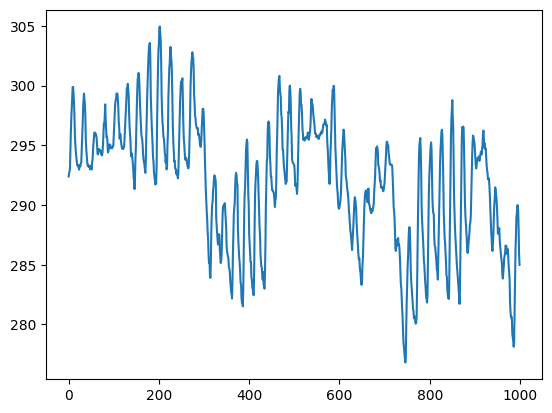

In [7]:
data_temp = pd.read_csv('temperature.csv')['New York'].dropna().iloc[-1000:].reset_index(drop=True)
plt.plot(data_temp)
plt.show()

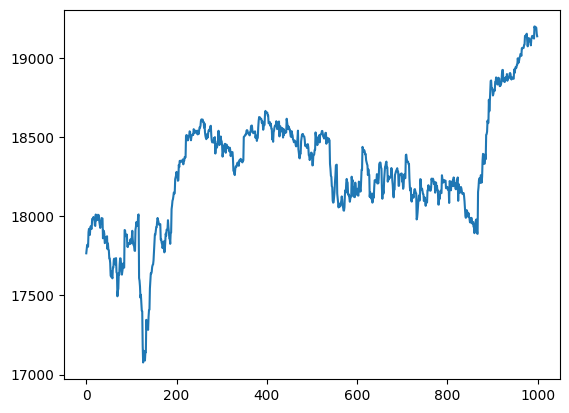

In [8]:
data_ind=pd.read_csv('/content/D&J-IND_150901_161130.txt')['<CLOSE>'].dropna().iloc[-1000:].reset_index(drop=True)
plt.plot(data_ind)
plt.show()

## Создаем датасеты

In [9]:
df_temp=pd.DataFrame({'y':data_temp})
for i in range(1,10):
  df_temp[f'x_{i}']=df_temp['y'].shift(i)

df_temp=df_temp.iloc[10:]
df_temp

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
10,299.88,299.88,299.15,298.23,297.40,296.24,294.78,293.14,292.78,292.69
11,299.23,299.88,299.88,299.15,298.23,297.40,296.24,294.78,293.14,292.78
12,298.48,299.23,299.88,299.88,299.15,298.23,297.40,296.24,294.78,293.14
13,297.23,298.48,299.23,299.88,299.88,299.15,298.23,297.40,296.24,294.78
14,295.65,297.23,298.48,299.23,299.88,299.88,299.15,298.23,297.40,296.24
...,...,...,...,...,...,...,...,...,...,...
995,289.98,289.98,289.23,288.98,287.32,286.23,283.84,281.06,278.44,278.13
996,289.48,289.98,289.98,289.23,288.98,287.32,286.23,283.84,281.06,278.44
997,287.92,289.48,289.98,289.98,289.23,288.98,287.32,286.23,283.84,281.06
998,285.83,287.92,289.48,289.98,289.98,289.23,288.98,287.32,286.23,283.84


In [10]:
df_ind=pd.DataFrame({'y':data_ind})
for i in range(1,10):
  df_ind[f'x_{i}']=df_ind['y'].shift(i)
df_ind=df_ind.iloc[10:]
df_ind

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
10,17937.135627,17927.545303,17882.273775,17919.465030,17920.605069,17900.224381,17807.661255,17807.391246,17819.651660,17795.100831
11,17920.045050,17937.135627,17927.545303,17882.273775,17919.465030,17920.605069,17900.224381,17807.661255,17807.391246,17819.651660
12,17920.935080,17920.045050,17937.135627,17927.545303,17882.273775,17919.465030,17920.605069,17900.224381,17807.661255,17807.391246
13,17982.917173,17920.935080,17920.045050,17937.135627,17927.545303,17882.273775,17919.465030,17920.605069,17900.224381,17807.661255
14,17984.767235,17982.917173,17920.935080,17920.045050,17937.135627,17927.545303,17882.273775,17919.465030,17920.605069,17900.224381
...,...,...,...,...,...,...,...,...,...,...
995,19196.478147,19187.347839,19198.468214,19122.245641,19124.915731,19135.416086,19138.546191,19139.056208,19130.795930,19117.515481
996,19192.888026,19196.478147,19187.347839,19198.468214,19122.245641,19124.915731,19135.416086,19138.546191,19139.056208,19130.795930
997,19190.897959,19192.888026,19196.478147,19187.347839,19198.468214,19122.245641,19124.915731,19135.416086,19138.546191,19139.056208
998,19152.276655,19190.897959,19192.888026,19196.478147,19187.347839,19198.468214,19122.245641,19124.915731,19135.416086,19138.546191


## Создаем модель



In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import Adam, SGD, Nadam, Adagrad, Adadelta
from keras.losses import MeanSquaredError, MeanAbsoluteError, Hinge, LogCosh, Poisson

In [12]:
losses = [MeanSquaredError(), MeanAbsoluteError(), Hinge(), LogCosh(), Poisson()]
optimizers = [Adam(), SGD(), Adagrad(), Adadelta(), Nadam()]

In [13]:
model = Sequential()
model.add(Dense(64,activation='relu', input_dim=9))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

In [ ]:
def test_models(train, test):
  df = []

  for optimizer in optimizers:
    for loss in losses:
          model.compile(loss=loss.name, optimizer=optimizer.name)
          model.fit(train.drop('y',axis=1).values, train['y'].values, epochs=50,verbose=0)
          test_loss = model.evaluate(test.drop('y',axis=1).values, test['y'].values)

          df.append([optimizer.name, loss.name, test_loss])
  df=pd.DataFrame(df,columns = ['optimizer_name','loss_name', 'loss_value'])
  return df


df_results=test_models(df_temp.iloc[:800], df_temp.iloc[800:])

In [27]:
#results
df_results.pivot(index='optimizer_name',columns='loss_name',values='loss_value')

loss_name,hinge,log_cosh,mean_absolute_error,mean_squared_error,poisson
optimizer_name,,,,,
Adadelta,1.0,288.333954,289.0271,83559.21875,4658.566406
Adagrad,1.0,288.333954,289.0271,83559.21875,4658.566406
Adam,1.0,288.333954,289.0271,83559.21875,4658.566406
Nadam,1.0,288.333954,289.0271,83559.21875,4658.566406
SGD,1.0,288.333954,289.0271,83559.21875,4658.566406


In [28]:
df_results=test_models(df_ind.iloc[:800], df_ind.iloc[800:])


6/6 [==============================] - 0s 3ms/step - loss: 299970.5625


In [29]:
#results
df_results.pivot(index='optimizer_name',columns='loss_name',values='loss_value')

loss_name,hinge,log_cosh,mean_absolute_error,mean_squared_error,poisson
optimizer_name,,,,,
Adadelta,1.0,18610.101562,18610.794922,346540640.0,299970.5625
Adagrad,1.0,18610.101562,18610.794922,346540640.0,299970.5625
Adam,1.0,18610.101562,18610.794922,346540640.0,299970.5625
Nadam,1.0,18610.101562,18610.794922,346540640.0,299970.5625
SGD,1.0,18610.101562,18610.794922,346540640.0,299970.5625
